In [14]:
import numpy as np
import struct
from PIL import Image
import matplotlib.pyplot as plt

Dataset provided from http://etlcdb.db.aist.go.jp/

In [15]:
# Function for reading and recording character data provided by the ETL database
# https://github.com/choo/etlcdb-image-extractor

def read_record_katakana_ETL1(file):
    s = file.read(2052)
    r = struct.unpack('>H2sH6BI4H4B4x2016s4x', s)
    imgF = Image.frombytes('F', (64, 63), r[18], 'bit', 4)
    imgP = imgF.convert('P')
    return r + (imgP, )

In [16]:
# Function for reading and recording each ETL file containing hiragana characters and recording and saving them
# to a compressed file katakana.npz

# ETL1 specifications: http://etlcdb.db.aist.go.jp/specification-of-etl-1

def read_katakana():
    katakana = np.zeros([51, 1411, 63, 64], dtype=np.uint8) # 51 characters, 1411 writers, img size = 63*64
    for filenumber in range(7,14): # Only ETL1 files 7 thru 13 contain katakana characters
        filename = './ETL1/ETL1C_{:02d}'.format(filenumber)
        with open(filename, 'rb') as f: # file 13 only has 3 classes, others have 8 classes
            if filenumber != 13: 
                limit = 8
            else: 
                limit = 3
            for dataset in range(limit):
                for j in range(1411):
                    try :
                        r = read_record_katakana_ETL1(f)
                        katakana[(filenumber - 7) * 8 + dataset, j] = np.array(r[-1])
                    except struct.error: # accounts for 2 missing images in dataset
                        pass
    np.savez_compressed("katakana_dupes.npz", katakana)

In [17]:
read_katakana()
katakana = np.load("katakana_dupes.npz")["arr_0"]

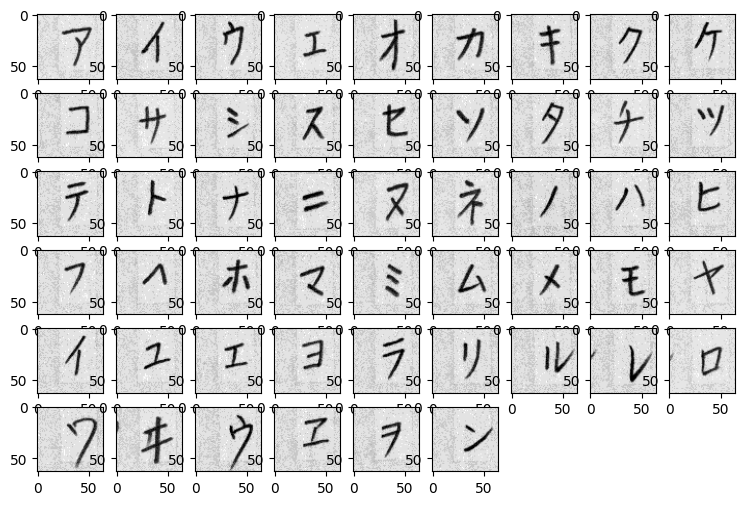

In [18]:
fig=plt.figure(figsize=(9, 9))
for i in range(51):
    katakana_image = katakana[i, 0]
    fig.add_subplot(9, 9, i + 1)
    plt.imshow(katakana_image, cmap = plt.cm.binary)

36, 38, and 47 are the same characters as 1, 3, 2 respectively

In [19]:
# Remove duplicate characters columns
katakana_no_dupes = np.delete(katakana, [36, 38, 47], 0)

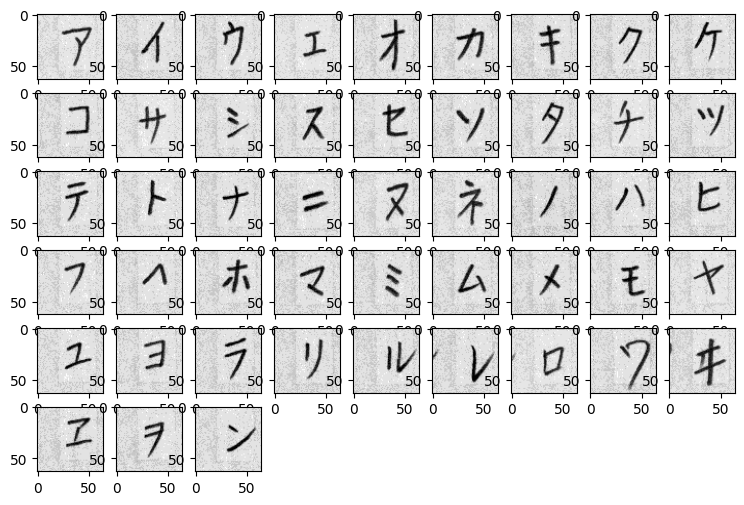

In [20]:
fig=plt.figure(figsize=(9, 9))
for i in range(48):
    hirimage = katakana_no_dupes[i, 0]
    fig.add_subplot(9, 9, i + 1)
    plt.imshow(hirimage, cmap = plt.cm.binary)

In [21]:
np.savez_compressed("katakana.npz", katakana_no_dupes)